# Data  Cleaning Notebook
__This notebook handles all preprocessing steps required to prepare our churn dataset for analysis and modeling.__

**Objectives:**
- Handle data bugs and ambiguity
- Clean and standardize categorical values
- Handle missing or inconsistent data
- Rename poorly labeled columns for clarity
- Detect and fix duplicates or outliers
- Prepare data for encoding and scaling

In [107]:
import pandas as pd
import numpy as np
import pickle

__creating a copy of the original dataset__

In [108]:
churn_df = pd.read_excel("../data/raw/E Commerce Dataset.xlsx", sheet_name="E Comm")
churn_df_copy = churn_df.copy()

In [109]:
churn_df_copy.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [110]:
churn_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Renaming Columns
We want to rename a column while still keepimg the same naming convention

In [111]:
churn_df_copy.rename(columns={
    "PreferedOrderCat" : "PreferredOrderCat"
}, inplace=True)
# churn_df_copy.head()

<hr/>

### Standardizing Value Naming in Categorical Columns

__importing variables from our exploratory_analysis notebook__

In [112]:

with open("eda_variables.pkl", "rb") as var:
    variables = pickle.load(var)

cat_cols = variables["cat_cols"]
num_cols = variables["num_cols"]

print(f"Categorical columns : {cat_cols}")
print(f"Numerical columns : {num_cols}")

Categorical columns : ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Numerical columns : ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


We can rename column categories as one category to have a standard naming type. Cases like these may require extra upstream clearification

In [113]:
# Preferred Login Device
churn_df_copy = churn_df_copy.replace({
    'PreferredLoginDevice': {'Mobile Phone': 'Phone'}
})

# Preffered Payment Mode
churn_df_copy = churn_df_copy.replace({
    "PreferredPaymentMode" : {
        "CC" : "Credit Card",
        "COD" : "Cash on Delivery",
        "UPI" : "Unified Payments Interface"
        }
})

# Preferred Order Category
churn_df_copy = churn_df_copy.replace({
    'PreferredOrderCat': {'Mobile': 'Mobile Phone'}
})

# churn_df_copy["PreferredPaymentMode"].value_counts()

<hr/>

## Handling Missing Values
__Now, we will inspect the dataset for missing values and decide how best to tackle it__

In [114]:
churn_df_copy.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
665,50666,0,6.0,Phone,1,11.0,Debit Card,Male,2.0,4,Fashion,2,Married,5,0,15.0,0.0,1.0,2.0,171.19
3092,53093,0,4.0,Phone,3,19.0,Cash on Delivery,Female,3.0,4,Laptop & Accessory,3,Single,2,0,12.0,4.0,5.0,5.0,190.77
5134,55135,0,1.0,Computer,3,9.0,Debit Card,Male,3.0,6,Laptop & Accessory,1,Single,5,0,21.0,1.0,2.0,1.0,175.71
450,50451,0,27.0,Phone,1,25.0,Credit Card,Female,3.0,3,Laptop & Accessory,5,Married,10,1,11.0,0.0,1.0,4.0,154.85
856,50857,1,0.0,Computer,3,24.0,E wallet,Female,3.0,3,Laptop & Accessory,3,Divorced,1,1,18.0,3.0,3.0,2.0,146.14


In [115]:
# The number of values missing in each of our columns
churn_df_copy.isna().sum().sort_values(ascending=False)


DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferredOrderCat                0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

__In a real setting, it would be best to ask (e.g the data provider, data engineer, manager) why these values are missing or what 'missing' means for each of these columns<br/>__
__We will also be referencing the plot from the explanatory_analysis.ipynb notebook to understand the distribution of numerical columns__

<hr/>

### <u>Days Since Last Order (`DaySinceLastOrder`)</u>
__The number of days that have passed since a customer made their most recent purchase__

<li>We are going to create a new feature from the missing values. NaN <b>could mean that the customer has never actually placed an order</b></li> 
<li>We'll change the column values from decimal to integer</li> 
<li>A large or negative number can skew the data or confuse machine learning models later on in the project</li>


In [116]:
churn_df_copy["DaySinceLastOrder"].max()    # Maximum number of days a customer hasn't ordered is 46


# Median to fill missing values
median = churn_df_copy["DaySinceLastOrder"].median()    # Median value is 3
churn_df_copy.fillna({"DaySinceLastOrder": median}, inplace=True)


# Converting `DaySinceLastOrder` column to an integer
churn_df_copy['DaySinceLastOrder'] = churn_df_copy['DaySinceLastOrder'].astype(int)

churn_df_copy["DaySinceLastOrder"].isna().any()     # False
churn_df_copy.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2979,52980,0,2.0,Phone,1,15.0,Debit Card,Female,4.0,4,Mobile Phone,2,Single,3,0,22.0,1.0,2.0,3,158.10
3171,53172,0,8.0,Phone,1,7.0,Debit Card,Male,3.0,5,Mobile Phone,2,Divorced,3,1,14.0,1.0,2.0,4,161.22
581,50582,1,3.0,Computer,3,30.0,Debit Card,Female,3.0,1,Grocery,4,Single,5,1,16.0,1.0,NaN,0,231.94
4555,54556,0,17.0,Computer,1,28.0,Credit Card,Male,4.0,4,Mobile Phone,1,Married,9,0,21.0,2.0,2.0,3,147.58
1644,51645,0,24.0,Phone,1,8.0,Credit Card,Male,2.0,5,Laptop & Accessory,4,Married,6,0,18.0,0.0,1.0,2,154.82


<p>We won't be adding a new feature, the dataset shows that some values that were missing actually used coupons and had orders. The missing values may a data entry issue</P>
<p>For the sake of this project, we will be imputing missing vallues with the median. More context would be needed to know how best to handle this</p>


<hr/>

### <u>Order Amount Hike From Last Year (`OrderAmountHikeFromlastYear`)</u>
__The percentage increase (or change) in the total amount a customer spent this year compared to the previous year__

If the missing values is due to new customers, we could create a feature that flags such customers. It would help to get additional data from the data source if possible

**Missing values could mean:**
+ No order history last year
+ A data issue
+ A user who's new to the platform


<p>Some of these missing values are from customers who placed orders recently and received cashback</p>

In [117]:
churn_df_copy.rename(columns={
    "OrderAmountHikeFromlastYear" : "OrderAmountHikeFromlastYear(%)"
}, inplace=True)

# Better view of how missing values in OrderAmountHikeFromlastYear(%) coolumn relates with others
churn_df_copy[[
    "Tenure","DaySinceLastOrder","OrderCount",
    "CashbackAmount", "OrderAmountHikeFromlastYear(%)"]][churn_df_copy["OrderAmountHikeFromlastYear(%)"].isna()].query("Tenure > 11")

,Tenure,DaySinceLastOrder,OrderCount,CashbackAmount,OrderAmountHikeFromlastYear(%)
40,23.0,4,4.0,299.26,NaN
65,25.0,9,11.0,299.99,NaN
106,15.0,15,11.0,292.32,NaN
108,23.0,6,1.0,295.17,NaN
119,18.0,7,1.0,292.02,NaN
...,...,...,...,...,...
5534,61.0,1,2.0,303.75,NaN
5537,23.0,4,5.0,316.61,NaN
5561,29.0,5,2.0,321.36,NaN
5597,13.0,4,2.0,319.31,NaN


In [118]:
print(f"max % hike from a customer is {churn_df_copy["OrderAmountHikeFromlastYear(%)"].max()}")
median = churn_df_copy["OrderAmountHikeFromlastYear(%)"].median()    # Median value is 15%
churn_df_copy.fillna({"OrderAmountHikeFromlastYear(%)": median}, inplace=True)

max % hike from a customer is 26.0


Out of __265__ rows with missing values, __253__ of them have been around for at least a year. 

This indicates the missingness is **not due to new customers**, but likely due to **data or recording errors**.

To maintain its distribution integrity, we imputed these missing values with the **median** of the non-missing data.

In [119]:
# The number of values missing in each of our columns out of 5630 entries
churn_df_copy.isna().sum().sort_values(ascending=False)

Tenure                            264
OrderCount                        258
CouponUsed                        256
HourSpendOnApp                    255
WarehouseToHome                   251
CustomerID                          0
MaritalStatus                       0
DaySinceLastOrder                   0
OrderAmountHikeFromlastYear(%)      0
Complain                            0
NumberOfAddress                     0
PreferredOrderCat                   0
SatisfactionScore                   0
Churn                               0
NumberOfDeviceRegistered            0
Gender                              0
PreferredPaymentMode                0
CityTier                            0
PreferredLoginDevice                0
CashbackAmount                      0
dtype: int64

<hr/>

### <u>Tenure</u>
+ `Tenure` column ranges from 0 - 61, the data dictionary doesn't make it clear if its values are in months or in days
+ We will take that tenure is in months as it is the typical standard for ecommerce data and according to the data dictionary, many other column values are measured in months as well

In [120]:
churn_df_copy.rename(columns={
    "Tenure" : "Tenure(months)"
}, inplace=True)

In [121]:
churn_df_copy.corr(numeric_only=True)["Tenure(months)"]

CustomerID                        0.029952
Churn                            -0.349408
Tenure(months)                    1.000000
CityTier                         -0.060688
WarehouseToHome                  -0.018218
HourSpendOnApp                   -0.021226
NumberOfDeviceRegistered         -0.023983
SatisfactionScore                -0.013903
NumberOfAddress                   0.237666
Complain                         -0.021268
OrderAmountHikeFromlastYear(%)   -0.006693
CouponUsed                        0.129035
OrderCount                        0.186403
DaySinceLastOrder                 0.173696
CashbackAmount                    0.476380
Name: Tenure(months), dtype: float64

Tenure is likely in months because it also has a weak correlation with the `DaySinceLastOrder` column. If it were in days, there would be a stronger correlation between the two.

In [122]:
missing_tenure = churn_df_copy[["Tenure(months)", "CashbackAmount", "OrderCount", "OrderAmountHikeFromlastYear(%)"]][churn_df_copy["Tenure(months)"].isna()]
missing_tenure.isna().sum()

Tenure(months)                    264
CashbackAmount                      0
OrderCount                          0
OrderAmountHikeFromlastYear(%)      0
dtype: int64


+ Missing values in `Tenure` column have corrsponding values in other columns that indicate customer activity within a month so this is not a case of missing tenure due to new users
+ Missingness in this case is random; we will input the missing values with the average customer tenure for all our customers

<Axes: >

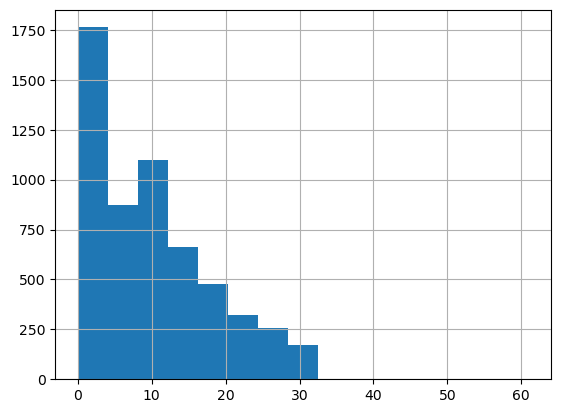

In [123]:
median = churn_df_copy["Tenure(months)"].median()    # Median value is 9
churn_df_copy.fillna({"Tenure(months)": median}, inplace=True)

churn_df_copy['Tenure(months)'].hist(bins=15)

Most of our customers stay from 0-10 months (would be more unrealistic if tenure was measured in days)

<hr/>

### <u>WarehouseToHome</u>
+ This column has 251 missing values. Since this is a location-based profile feature (likely in kilometers), we assumed the missingness was due to incomplete address records. We imputed with the median to preserve its distribution without skewing the data or outliers.


<Axes: >

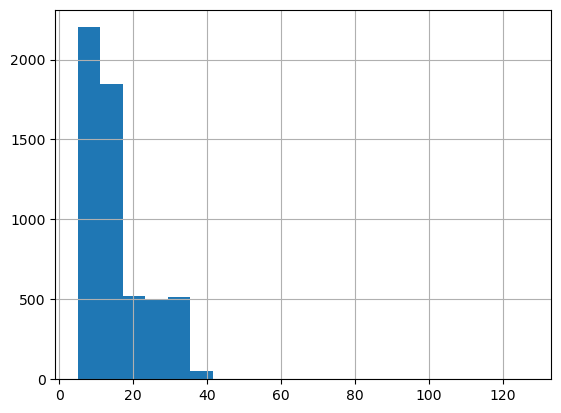

In [124]:
median = churn_df_copy["WarehouseToHome"].median()    # Median value is 14.0 (km)
churn_df_copy.fillna({"WarehouseToHome": median}, inplace=True)\

churn_df_copy["WarehouseToHome"].hist(bins=20)

Most of our custumers live within 20km of our warehouse

<hr/>

In [125]:
churn_df_copy.isna().sum().sort_values(ascending=False)

OrderCount                        258
CouponUsed                        256
HourSpendOnApp                    255
CustomerID                          0
SatisfactionScore                   0
DaySinceLastOrder                   0
OrderAmountHikeFromlastYear(%)      0
Complain                            0
NumberOfAddress                     0
MaritalStatus                       0
PreferredOrderCat                   0
Churn                               0
NumberOfDeviceRegistered            0
Gender                              0
PreferredPaymentMode                0
WarehouseToHome                     0
CityTier                            0
PreferredLoginDevice                0
Tenure(months)                      0
CashbackAmount                      0
dtype: int64